In [1]:
#Training the image classifier
import torch
import torchvision
import torchvision.transforms as transforms
from Bio.Seq import Seq
import os
import glob
import pathlib
import pickle
import numpy as np


In [2]:
strep_train = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\training data\\strep_train.txt', 'rb'))
lacto_train = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\training data\\lacto_train.txt', 'rb'))
bac_train = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\training data\\bac_train.txt', 'rb'))
pseudo_train = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\training data\\pseudo_train.txt', 'rb'))

strep_train = strep_train[:len(strep_train)//2]
lacto_train = lacto_train[:len(lacto_train)//2]
bac_train = bac_train[:len(bac_train)//2]
pseudo_train = pseudo_train[:len(pseudo_train)//2]


strep_train_array = np.asarray(strep_train)
strep_train_array = np.reshape(strep_train_array, [len(strep_train_array), 1, 64, 64])
# print(strep_train_array.shape)

lacto_train_array = np.asarray(lacto_train)
lacto_train_array = np.reshape(lacto_train_array, [len(lacto_train_array), 1, 64, 64])
# print(lacto_train_array.shape)

bac_train_array = np.asarray(bac_train)
bac_train_array = np.reshape(bac_train_array, [len(bac_train_array), 1, 64, 64])
# print(bac_train_array.shape)

pseudo_train_array = np.asarray(pseudo_train)
pseudo_train_array = np.reshape(pseudo_train_array, [len(pseudo_train_array), 1, 64, 64])
# print(pseudo_train_array.shape)

train_full_list = np.concatenate((strep_train_array, lacto_train_array, bac_train_array, pseudo_train_array))

# print(train_full_list.shape)

# print(strep_train_array[5])

# print(train_full_list[5])

label_bac = np.ones(len(bac_train_array)) * 1
label_lacto = np.ones(len(lacto_train_array)) * 2
label_pseudo = np.ones(len(pseudo_train_array)) * 3
label_strep = np.ones(len(strep_train_array)) * 4

train_label_list = np.concatenate((label_strep, label_lacto, label_bac, label_pseudo))

# print(len(train_label_list))

In [6]:
strep_test = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\testing data\\strep_test.txt', 'rb'))
lacto_test = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\testing data\\lacto_test.txt', 'rb'))
bac_test = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\testing data\\bac_test.txt', 'rb'))
pseudo_test = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\testing data\\pseudo_test.txt', 'rb'))

strep_test = strep_test[:len(strep_test)//2]
lacto_test = lacto_test[:len(lacto_test)//2]
bac_test = bac_test[:len(bac_test)//2]
pseudo_test = pseudo_test[:len(pseudo_test)//2]

strep_test_array = np.asarray(strep_test)
strep_test_array = np.reshape(strep_test_array, [len(strep_test_array), 1, 64, 64])
print(strep_test_array.shape)

lacto_test_array = np.asarray(lacto_test)
lacto_test_array = np.reshape(lacto_test_array, [len(lacto_test_array), 1, 64, 64])
print(lacto_test_array.shape)

bac_test_array = np.asarray(bac_test)
bac_test_array = np.reshape(bac_test_array, [len(bac_test_array), 1, 64, 64])
print(bac_test_array.shape)

pseudo_test_array = np.asarray(pseudo_test)
pseudo_test_array = np.reshape(pseudo_test_array, [len(pseudo_test_array), 1, 64, 64])
print(pseudo_test_array.shape)

test_full_list = np.concatenate((strep_test_array, lacto_test_array, bac_test_array, pseudo_test_array))

print(test_full_list.shape)

# print(strep_test_array[5])

# print(test_full_list[5])

label_bac = np.ones(len(bac_test_array)) * 1
label_lacto = np.ones(len(lacto_test_array)) * 2
label_pseudo = np.ones(len(pseudo_test_array)) * 3
label_strep = np.ones(len(strep_test_array)) * 4

test_label_list = np.concatenate((label_strep, label_lacto, label_bac, label_pseudo))

(2868, 1, 64, 64)
(936, 1, 64, 64)
(7557, 1, 64, 64)
(8938, 1, 64, 64)
(20299, 1, 64, 64)


In [22]:
# training dataset assembly
from torch.utils.data import TensorDataset, DataLoader

# use x_train and y_train as numpy array without further modification
x_train = np.array(train_full_list)
y_train = np.array(train_label_list)

# convert to numpys to tensor
tensor_x = torch.Tensor(x_train)
tensor_y = torch.Tensor(y_train)
# create the dataset
trainset = TensorDataset(tensor_x,tensor_y) 
# create your dataloader
trainloader = DataLoader(trainset,batch_size=64, shuffle=True) 

#check if you can get the desired things
i1, l1 = next(iter(trainloader))
print(i1.shape)   # torch.Size([1, 1, 28, 28]) 
print(l1.shape)   # torch.Size([1]) 


torch.Size([64, 1, 64, 64])
torch.Size([64])


In [23]:
# fix to custom dataset work?
from torch.utils.data import TensorDataset, DataLoader

# use x_train and y_train as numpy array without further modification
x_test = np.array(test_full_list)
y_test = np.array(test_label_list)

# convert to numpys to tensor
tensor_x1 = torch.Tensor(x_test)
tensor_y1 = torch.Tensor(y_test)
# create the dataset
testset = TensorDataset(tensor_x1,tensor_y1) 
# create your dataloader
testloader = DataLoader(testset,batch_size=64, shuffle=True) 

#check if you can get the desired things
i2, l2 = next(iter(testloader))
print(i2.shape)   # torch.Size([1, 1, 28, 28]) 
print(l2.shape)   # torch.Size([1]) 

torch.Size([64, 1, 64, 64])
torch.Size([64])


In [24]:
def npy_loader(path):
    sample = torch.from_numpy(np.load(path))
    return sample

In [25]:
import matplotlib.pyplot as plt
import numpy as np

batch_size = 64

classes = torch.Tensor([1, 2, 3, 4]).type(torch.LongTensor)

In [26]:
# shows image, likely unneeded
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


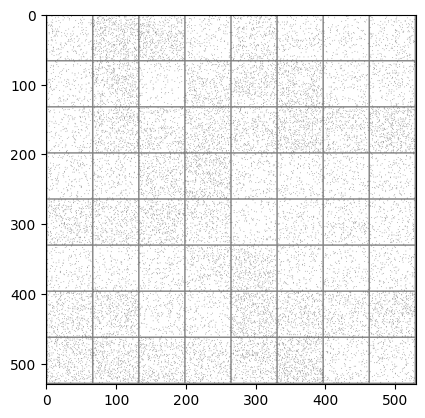

    3     1     1     3     1     3     3     3     3     1     3     1     4     4     3     3     3     2     2     1     1     1     1     1     3     3     1     2     3     3     3     3     1     2     1     4     3     3     3     3     3     3     3     4     2     3     3     3     4     1     3     3     2     4     1     4     4     1     4     4     2     1     3     3


In [27]:
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
images = images.type(torch.LongTensor)
labels = labels.type(torch.LongTensor)
# show imagesx
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]-1]:5d}' for j in range(batch_size)))

In [31]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 1 output channel, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 4, 16)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(4, 1, 8)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(64, 64)  # 5*5 from image dimension
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)

    def forward(self, input):
        # Convolution layer C1: 1 input image channel, 6 output channels,
        # 5x5 square convolution, it uses RELU activation function, and
        # outputs a Tensor with size (N, 6, 28, 28), where N is the size of the batch
        c1 = F.relu(self.conv1(input))
        # Subsampling layer S2: 2x2 grid, purely functional,
        # this layer does not have any parameter, and outputs a (N, 16, 14, 14) Tensor
        s2 = F.max_pool2d(c1, (2, 2))
        # Convolution layer C3: 6 input channels, 16 output channels,
        # 5x5 square convolution, it uses RELU activation function, and
        # outputs a (N, 16, 10, 10) Tensor
        c3 = F.relu(self.conv2(s2))
        # Subsampling layer S4: 2x2 grid, purely functional,
        # this layer does not have any parameter, and outputs a (N, 16, 5, 5) Tensor
        s4 = F.max_pool2d(c3, 2)
        # Flatten operation: purely functional, outputs a (N, 400) Tensor
        s4 = torch.flatten(s4, 1)
        # Fully connected layer F5: (N, 400) Tensor input,
        # and outputs a (N, 120) Tensor, it uses RELU activation function
        f5 = F.relu(self.fc1(s4))
        # Fully connected layer F6: (N, 120) Tensor input,
        # and outputs a (N, 84) Tensor, it uses RELU activation function
        f6 = F.relu(self.fc2(f5))
        # Gaussian layer OUTPUT: (N, 84) Tensor input, and
        # outputs a (N, 10) Tensor
        output = self.fc3(f6)
        return output


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 4, kernel_size=(16, 16), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(4, 1, kernel_size=(8, 8), stride=(1, 1))
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
)


In [32]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [33]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [34]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        labels = labels.type(torch.LongTensor)
        # inputs, labels = inputs.to(device), labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.111
[2,  2000] loss: 0.890
Finished Training


In [35]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


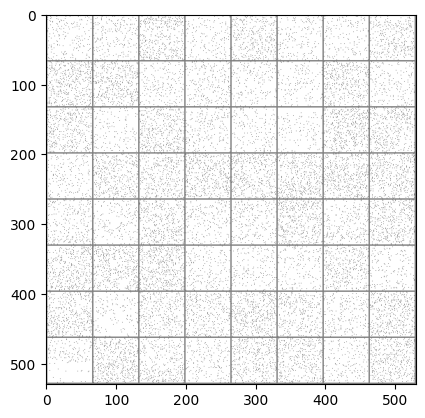

    3     3     4     3     4     3     3     1     1     1     3     3     3     3     1     3     1     3     1     3     3     3     1     1     3     1     1     1     1     2     1     2     3     3     2     3     3     1     3     4     1     1     1     3     3     3     1     3     4     3     1     1     1     1     3     2     3     1     4     3     2     1     3     4


In [36]:
dataiter = iter(testloader)
images, labels = next(dataiter)
images = images.type(torch.LongTensor)
labels = labels.type(torch.LongTensor)
# print images
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]-1]:5d}' for j in range(batch_size)))

In [37]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [38]:
images = images.type(torch.FloatTensor)
labels = labels.type(torch.FloatTensor)
outputs = net(images)

In [134]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5d}'
                              for j in range(64)))

Predicted:      2     4     2     2     4     2     2     4     2     2     2     4     2     4     2     2     2     2     4     2     2     2     2     2     4     2     2     4     4     4     4     4     4     2     2     2     2     4     2     4     2     4     2     2     2     4     2     4     2     2     2     4     2     4     2     4     2     4     4     2     2     4     2     2


In [40]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 64 test images: {100 * correct // total} %')

Accuracy of the network on the 64 test images: 71 %


In [149]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad(): 
    for data in testloader:
        images, labels = data
        labels = labels.type(torch.LongTensor)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label.item() - 1]] += 1
            total_pred[classes[label.item() - 1]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

KeyError: tensor(2)

In [292]:
net.to(device)
inputs, labels = data[0].to(device), data[1].to(device)